BMF implementation from TammoR: https://github.com/TammoR/LogicalFactorisationMachines/tree/master/lom
Thesis: https://ora.ox.ac.uk/objects/uuid:9d856435-7fcb-4d27-8a46-090a35ef79ee/download_file?file_format=application%2Fpdf&safe_filename=thesis.pdf&type_of_work=Thesis

Ensure TammoR packages are installed: https://github.com/TammoR/ormachine

In [3]:
import numpy as np
import pandas as pd
import numba
from sklearn.metrics import f1_score
import lom
import lom.auxiliary_functions as aux

c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lom_outputs.py:55: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:], int8[:])', nopython=False, nogil=True, parallel=True)
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lom_outputs.py:55: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "OR_AND_product_expand" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
  - Of which 2 did n

To install and test the LogicalFactorisationMachines package run the following code in terminal:
git clone https://github.com/TammoR/LogicalFactorisationMachines
cd LogicalFactorisationMachines/
pip3 install .
python3 tests/test_matrix_updates.py

# Example Implementation

In [25]:
# generate toy data
N = 20
D = 20
L = 3
Z = np.array(np.random.rand(N, L) > .5, dtype=np.int8)
U = np.array(np.random.rand(D, L) > .5, dtype=np.int8)

X = aux.lom_generate_data([2 * Z-1, 2 * U-1], model='OR-AND') # take Boolean product
X_noisy = aux.add_bernoulli_noise_2d(X, p=.1) # add noise

c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\auxiliary_functions.py:663: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\auxiliary_functions.py:667: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\si

X needs to be in -1, 1 mapping!


In [30]:
print("X unique values:", np.unique(X, return_counts = True))
print("X_noisy unique values:", np.unique(X_noisy, return_counts = True))

X unique values: (array([-1,  1], dtype=int8), array([205, 195], dtype=int64))
X_noisy unique values: (array([-1,  1], dtype=int8), array([197, 203], dtype=int64))


In [31]:
# initialise model
orm = lom.Machine()
data = orm.add_matrix(X_noisy, fixed=True)
layer = orm.add_layer(latent_size=3, child=data, model='OR-AND')


OR-AND is treated as OR-AND.



In [32]:
# initialise factors (optional)
layer.factors[0].val = np.array( 2*(np.random.rand(N, L) > .5) - 1, dtype=np.int8)

In [33]:
# Fix particular entries (1s in fixed_entries matrix) (optional)
layer.factors[1].fixed_entries = np.zeros(layer.factors[1]().shape, dtype=np.int8)
layer.factors[1].fixed_entries[0,:] = 1

In [34]:
# Set priors beta prior on sigmoid(lambda) (optional)
layer.lbda.beta_prior = (1,1)

In [35]:
# Set iid bernoulli priors on factor matrix entries (optional)
layer.factors[1].bernoulli_prior = .5

In [36]:
# Use annealing to improve convergence (optional, not needed in general).
orm.anneal = True
layer.lbda.val = 3.0 # if annealing: target temperature, otherwise initial value

In [37]:
# run inference
orm.infer(burn_in_min=100, burn_in_max=1000, no_samples=50)

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 130 recon acc.: 0.868
	converged at reconstr. accuracy: 0.868
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.876
finished.


rescaling matrix to probabilities
rescaling matrix to probabilities


[None, None]

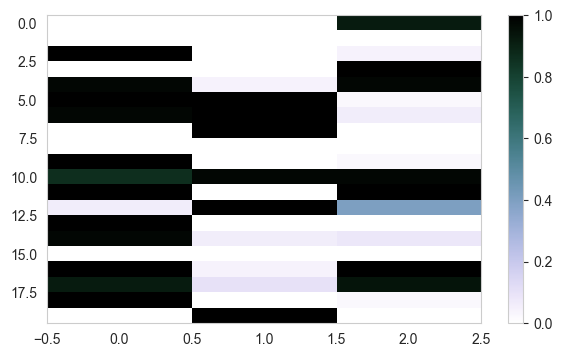

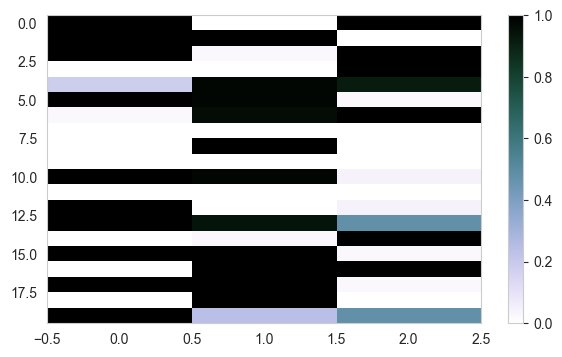

In [38]:
# inspect the factor mean
[layer.factors[i].show() for i in range(len(layer.factors))]

rescaling matrix to probabilities


Text(0.5, 1.0, 'Input data')

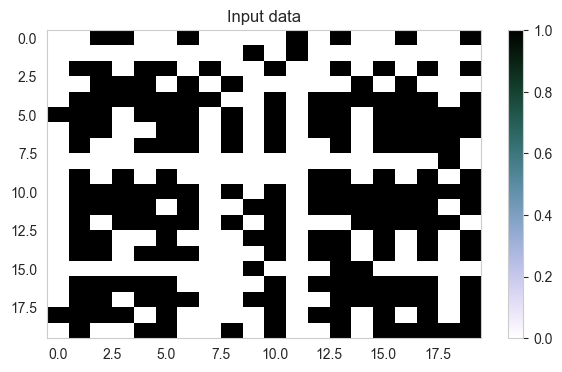

In [40]:
# inspect the reconstruction
fig, ax = aux.plot_matrix(X_noisy)
ax.set_title('Input data')

c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   

Text(0.5, 1.0, 'Reconstruction')

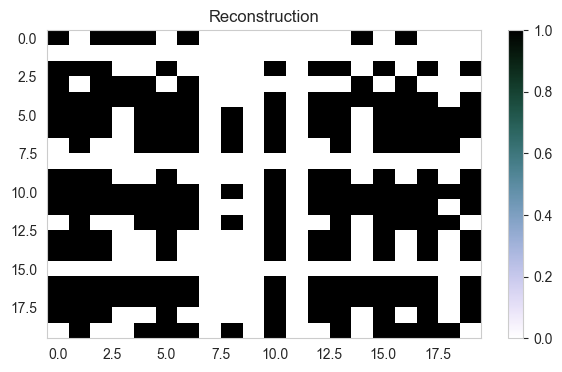

In [41]:
fig, ax = aux.plot_matrix(layer.output(technique='factor_map'))
ax.set_title('Reconstruction')

In [90]:
print(np.__version__)

# Is numpy version a problem?

1.23.5


rescaling matrix to probabilities


Text(0.5, 1.0, 'Noisefree data')

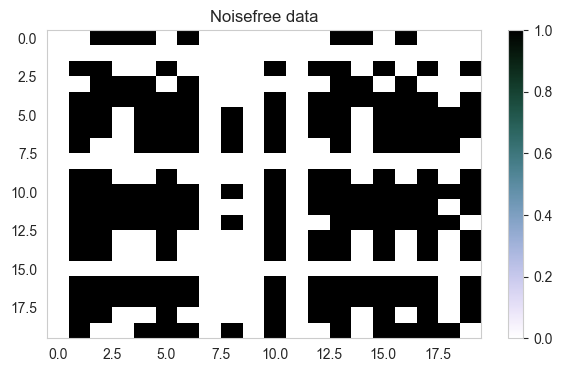

In [42]:
fig, ax = aux.plot_matrix(X)
ax.set_title('Noisefree data')

# ELSA Implementation

In [6]:
elsa = pd.read_csv(r'C:\Users\s1989190\Documents\GitHub\Structure-of-Frailty-ELSA\Analysis\Data\elsa_wave9.csv')
elsa.head()

,idauniq,indsex,age,frailty,num_nas,num_deficits,age_group,mob-walk100m,mob-sit2hrs,mob-stand_from_seated,...,gen-eyesight,gen-hearing,gen-fall,gen-hip_fracture,gen-joint_replacement,gen-pain_walking,mem_day_of_month,mem_month,mem_year,mem_day
0,104018,1,86,0.431034,1,25,86-90,1,0,1,...,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0
1,104232,2,66,0.103448,0,6,66-70,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105961,1,73,0.017241,0,1,70-75,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105988,2,82,0.068966,0,4,80-85,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,106516,2,81,0.034483,0,2,80-85,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
deficits = elsa.loc[:, 'mob-walk100m': 'mem_day']
deficits = deficits.dropna() # Remove rows with missing values

# Transform [0,1] mapping to [-1,1] so that for any binary variable x in [0,1], x~ = 2x - 1
deficits = (deficits * 2) - 1
deficits

,mob-walk100m,mob-sit2hrs,mob-stand_from_seated,mob-stairs_several_flights,mob-stairs_1flight,mob-kneeling,mob-extend_arms,mob-push_pull,mob-lift_10lb,mob-pick_up_coin,...,gen-eyesight,gen-hearing,gen-fall,gen-hip_fracture,gen-joint_replacement,gen-pain_walking,mem_day_of_month,mem_month,mem_year,mem_day
1,-1,-1,1,1,1,1,-1,-1,-1,-1,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1,-1,1,1,-1,1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4967,1,1,1,1,1,1,-1,1,1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4968,-1,-1,1,1,1,1,1,1,1,-1,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4969,-1,-1,1,-1,-1,1,-1,-1,-1,-1,...,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [8]:
# Change pandas df to matrix
print("Shape:", deficits.values.shape)
deficits_matrix = deficits.values

Shape: (4068, 58)


In [58]:
# orm.layers[0].lbda.mean() # Check sizee

2.4242594

In [37]:
# initialise model
orm = lom.Machine()
data = orm.add_matrix(deficits_matrix, fixed=True)

# Add a layer with a custom prior for lbda
#lbda_prior = [1.0, 1.0]  # Customize the prior parameters as needed

layer = orm.add_layer(latent_size=4, child=data, model='OR-AND')
#layer.lbda.set_prior(lbda_prior)  # Set the custom prior for lbda

# run inference
orm.infer(burn_in_min=100, 
          burn_in_max=1000, 
          no_samples=50, 
          convergence_eps=1e-4, # Tolerance level for convergence
          fix_lbda_iters=50) # Number of interations with fixed lbda

# Extract reconstructed matrix
predicted_matrix = layer.output(technique = 'factor_map')
predicted_matrix = (predicted_matrix  * 2) - 1 # Transform to [-1,1] mapping

# Calculate accuracy
total_elements = np.prod(deficits_matrix.shape)
correct_predictions = np.sum(deficits_matrix == predicted_matrix)
accuracy = correct_predictions / total_elements

# Compare the predictions to the ground truth
#predicted_matrix # Check predicted_matrix maps to [-1, 1] and doesn't need to be converted to binary

# Convert to binary?
# Calculate F1 Score
#f1 = f1_score(deficits_matrix.flatten(), predicted_matrix.flatten())
#print("F1 Score:", f1)



OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.89
	converged at reconstr. accuracy: 0.89
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.89
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   

In [27]:
z_matrix = orm.layers[0].z()
u_matrix = orm.layers[0].u()

print("Z shape:", z_matrix.shape)
print("U shape:", u_matrix.shape)

Z shape: (4068, 4)
U shape: (58, 4)


In [29]:
print("Z unique values:", np.unique(z_matrix, return_counts= True))
print("U unique values:", np.unique(u_matrix, return_counts= True))

Z unique values: (array([-1,  1], dtype=int8), array([10141,  6131], dtype=int64))
U unique values: (array([-1,  1], dtype=int8), array([225,   7], dtype=int64))


In [75]:
# For loop which iterates over number of factors from 1 to 58 (the number of deficits)

# Get the number of columns (factors) in the deficits_matrix
num_factors = deficits_matrix.shape[1]

# Create an empty list to store accuracy values
accuracy_values = []

# Loop over the number of factors
for i in range(1, num_factors + 1):
    # Initialize the model and set up the layer
    orm = lom.Machine()
    data = orm.add_matrix(deficits_matrix, fixed=True)
    layer = orm.add_layer(latent_size=i, child=data, model='OR-AND')

    # Run inference
    orm.infer(burn_in_min=100, burn_in_max=1000, no_samples=50)

    # Extract reconstructed matrix
    predicted_matrix = layer.output(technique='factor_map')
    predicted_matrix = (predicted_matrix * 2) - 1  # Transform to [-1, 1] mapping

    # Calculate accuracy
    total_elements = np.prod(deficits_matrix.shape)
    correct_predictions = np.sum(deficits_matrix == predicted_matrix)
    accuracy = correct_predictions / total_elements

    # Append accuracy to the list
    accuracy_values.append(accuracy)

accuracy_values


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.904
	converged at reconstr. accuracy: 0.904
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.904
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.89
	converged at reconstr. accuracy: 0.89
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.89
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.906
	converged at reconstr. accuracy: 0.906
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.906
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.89
	converged at reconstr. accuracy: 0.89
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.89
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.908
	converged at reconstr. accuracy: 0.909
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.908
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.89
	converged at reconstr. accuracy: 0.89
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.89
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.904
	converged at reconstr. accuracy: 0.904
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.904
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.904
	converged at reconstr. accuracy: 0.904
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.904
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.913
	converged at reconstr. accuracy: 0.913
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.913
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.913
	converged at reconstr. accuracy: 0.913
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.913
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.921
	converged at reconstr. accuracy: 0.921
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.922
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.917
	converged at reconstr. accuracy: 0.917
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.917
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.909
	converged at reconstr. accuracy: 0.909
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.908
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.912
	converged at reconstr. accuracy: 0.911
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.912
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.906
	converged at reconstr. accuracy: 0.906
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.906
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.917
	converged at reconstr. accuracy: 0.917
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.917
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 130 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   


OR-AND is treated as OR-AND.

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.5
	converged at reconstr. accuracy: 0.5
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.5
finished.


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   

[0.904710439765368,
 0.8897874071813651,
 0.907770487912386,
 0.8897874071813651,
 0.9101905536907062,
 0.8897874071813651,
 0.904710439765368,
 0.904710439765368,
 0.9166327603160072,
 0.9178618655274133,
 0.9264571254195911,
 0.9198072423965009,
 0.9101905536907062,
 0.9150137320720171,
 0.9076560539789102,
 0.9209558200250907,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.8897874071813651,
 0.88978740718136

In [81]:
# Get the number of columns (factors) in the deficits_matrix
num_factors = deficits_matrix.shape[1]

accuracy_df = pd.DataFrame({'Number_of_Factors': range(1, num_factors + 1), 'Accuracy': accuracy_values})
accuracy_df.head(20)

,Number_of_Factors,Accuracy
0,1,0.904710
1,2,0.889787
2,3,0.907770
3,4,0.889787
4,5,0.910191
5,6,0.889787
6,7,0.904710
7,8,0.904710
8,9,0.916633
9,10,0.917862


In [85]:
# Find the index of the maximum accuracy value
max_accuracy_index = accuracy_df['Accuracy'].idxmin()
max_accuracy_index

1

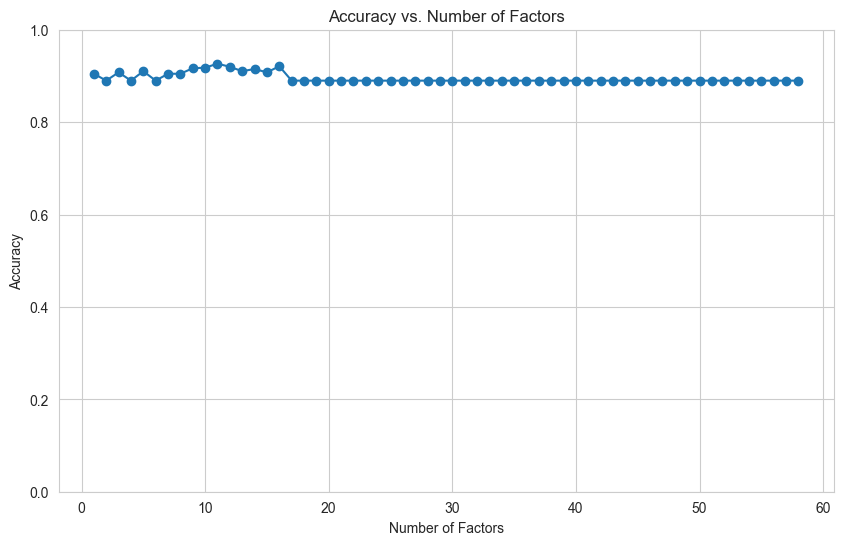

In [83]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(accuracy_df['Number_of_Factors'], accuracy_df['Accuracy'], marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Factors')
plt.xlabel('Number of Factors')
plt.ylabel('Accuracy')
plt.grid(True)

# Set x-axis limits from 0 to 1
plt.ylim(0, 1)

# Show the plot
plt.show()

In [ ]:
# Code for extracting decomposed matrices and reconstructing matrix - yields suspicious result

# Extract decomposed matrices
#Z = orm.layers[0].z.mean()
#U = orm.layers[0].u.mean()

# Take the product of the decomposed matrices
#predicted_matrix = np.dot(Z, U.T)

In [71]:
predicted_matrix = layer.output(technique = 'factor_map')
predicted_matrix = (predicted_matrix  * 2) - 1
predicted_matrix

c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

In [72]:
# Calculate accuracy
total_elements = np.prod(deficits_matrix.shape)
correct_predictions = np.sum(deficits_matrix == predicted_matrix)
accuracy = correct_predictions / total_elements

print("Accuracy:", accuracy)

Accuracy: 0.9229393415386702


In [66]:
np.unique(layer.output(technique = 'factor_map'), return_counts = True)

c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   

(array([0, 1], dtype=int8), array([224336,  11608], dtype=int64))

In [45]:
binary_result

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [46]:
np.unique(binary_original, return_counts= True) 

(array([0, 1]), array([209940,  26004], dtype=int64))

In [189]:
4068*58

235944

In [47]:
np.unique(binary_result, return_counts= True)

(array([0, 1]), array([ 89598, 146346], dtype=int64))

In [48]:
# Calculate accuracy
accuracy = np.mean(binary_original == binary_result)

# Multiply by 100 to express accuracy as a percentage
accuracy_percentage = accuracy * 100

print("Accuracy:", accuracy_percentage, "%")

Accuracy: 37.55975994303733 %


In [138]:

threshold = 0

binary_original = (deficits_matrix >= threshold).astype(int)
binary_result = (predicted_matrix >= threshold).astype(int)

# Calculate F1 Score
f1 = f1_score(binary_original.flatten(), binary_result.flatten())

print("F1 Score:", f1)

F1 Score: 0.14715547877878402


In [179]:
np.unique(predicted_matrix, return_counts= True)

(array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 array([47532,  3101,  3222,  6436,  9331,  8120,  6620,  3693,  2029,
          784,   247,   159,    58,    58,    15,   391,  1072,  3133,
         5181,  8924, 10904, 11491,  8644,  4086,  3917, 86796],
       dtype=int64))

In [94]:
# initialise model
orm = lom.Machine()
data = orm.add_matrix(deficits_matrix, fixed=True)
layer = orm.add_layer(latent_size=4, child=data, model='OR-AND')


OR-AND is treated as OR-AND.



In [67]:
# Code for Optional Parameters

# initialise factors (optional)
#layer.factors[0].val = np.array( 2*(np.random.rand(N, L) > .5) - 1, dtype=np.int8)

# Fix particular entries (1s in fixed_entries matrix) (optional)
#layer.factors[1].fixed_entries = np.zeros(layer.factors[1]().shape, dtype=np.int8)
#layer.factors[1].fixed_entries[0,:] = 1

# Set priors beta prior on sigmoid(lambda) (optional)
#layer.lbda.beta_prior = (1,1)

# Set iid bernoulli priors on factor matrix entries (optional)
#layer.factors[1].bernoulli_prior = .5

# Use annealing to improve convergence (optional, not needed in general).
#orm.anneal = True
#layer.lbda.val = 3.0 # if annealing: target temperature, otherwise initial value

In [95]:
# run inference
orm.infer(burn_in_min=100, burn_in_max=1000, no_samples=50)

Assigning sampling functions - 	child: OR_AND_2D
Assigning sampling functions - 	child: OR_AND_2D
Assigning update function: OR_AND_2D
burning in markov chain...
	iteration: 110 recon acc.: 0.907
	converged at reconstr. accuracy: 0.907
allocating memory to save samples...
drawing samples...
	iteration 50; recon acc.: 0.907
finished.


In [116]:
np.unique(orm.layers[0].z.mean(), return_counts= True)

(array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56,  0.  ,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 array([1630,  427,  283,  372,  437,  425,  304,  204,   97,   42,    8,
           6, 9119,    1,    5,   12,   35,   94,  166,  305,  422,  361,
         319,  226,  257,  715], dtype=int64))

In [115]:
np.unique(orm.layers[0].u.mean(), return_counts= True)

(array([-1.,  1.]), array([227,   5], dtype=int64))

rescaling matrix to probabilities


[None, None]

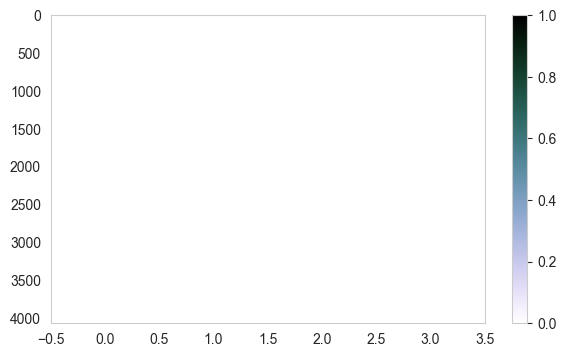

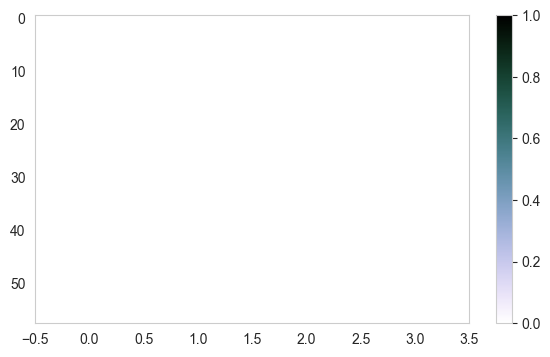

In [154]:
# inspect the factor mean
[layer.factors[i].show() for i in range(len(layer.factors))]

rescaling matrix to probabilities


c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit('int8[:,:](int8[:,:], int8[:,:])',
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\lom\_numba\lambda_updates_numba.py:95: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "output_function_2d" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(list(int64)<iv=None>, dtype=class(int8))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
   

Text(0.5, 1.0, 'Reconstruction')

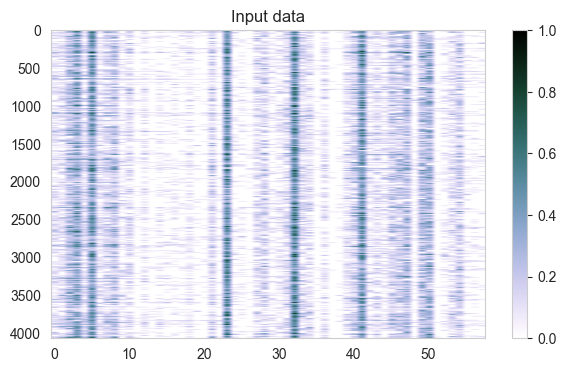

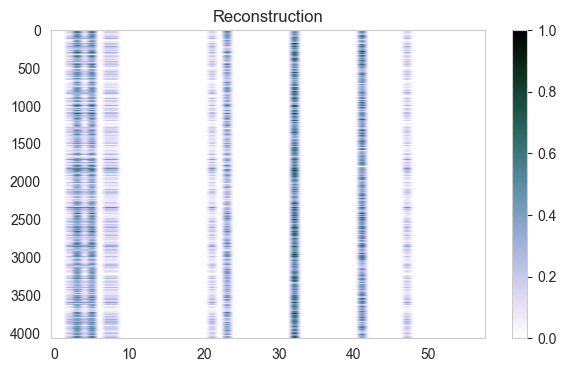

In [63]:
# inspect the reconstruction
fig, ax = aux.plot_matrix(deficits_matrix)
ax.set_title('Input data')

fig, ax = aux.plot_matrix(layer.output(technique='factor_map'))
ax.set_title('Reconstruction')